In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import  fetch_openml
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
housing = fetch_openml(name="Boston", as_frame=True)

/home/vijeth/learning/ml-lab/ml-lab/lib/python3.11/site-packages/sklearn/datasets/_openml.py:323: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=531
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=853

  warn(warning_msg)


In [10]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df.shape

(506, 13)

In [11]:
df["TARGET"] = housing.target
df.shape

(506, 14)

In [ ]:
X = df.drop(columns=["TARGET"])
y = df["TARGET"]
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [15]:
X = X.apply(pd.to_numeric, errors='coerce')
X.isnull().sum()     # No null values 

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=42 , test_size=0.3)

In [17]:
X_train.shape, X_test.shape

((354, 13), (152, 13))

In [18]:
y_train.shape, y_test.shape

((354,), (152,))

In [19]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

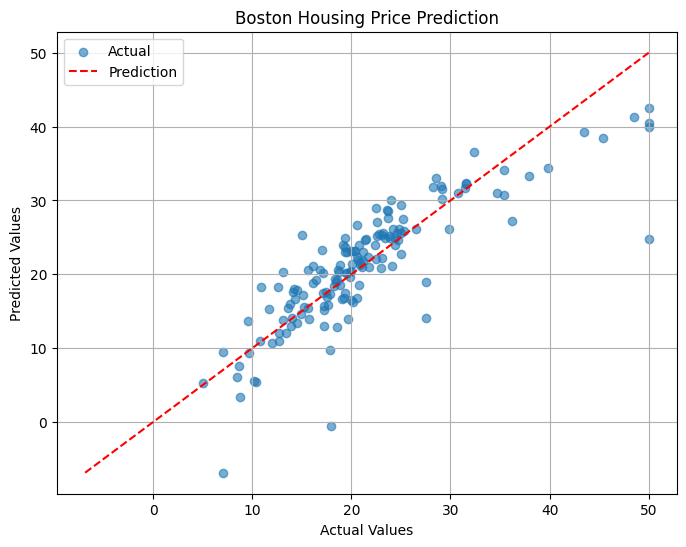

In [36]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(y_test, y_pred, alpha=0.6, label="Actual")

min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))

plt.plot([min_val, max_val], [min_val,max_val], "r--", label="Prediction")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Boston Housing Price Prediction")
plt.legend()
plt.grid(True)
plt.show()

In [38]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

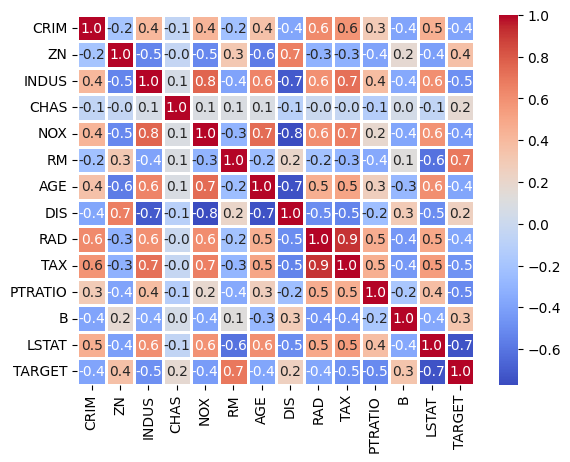

In [44]:

sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.1f', linewidths=0.9)

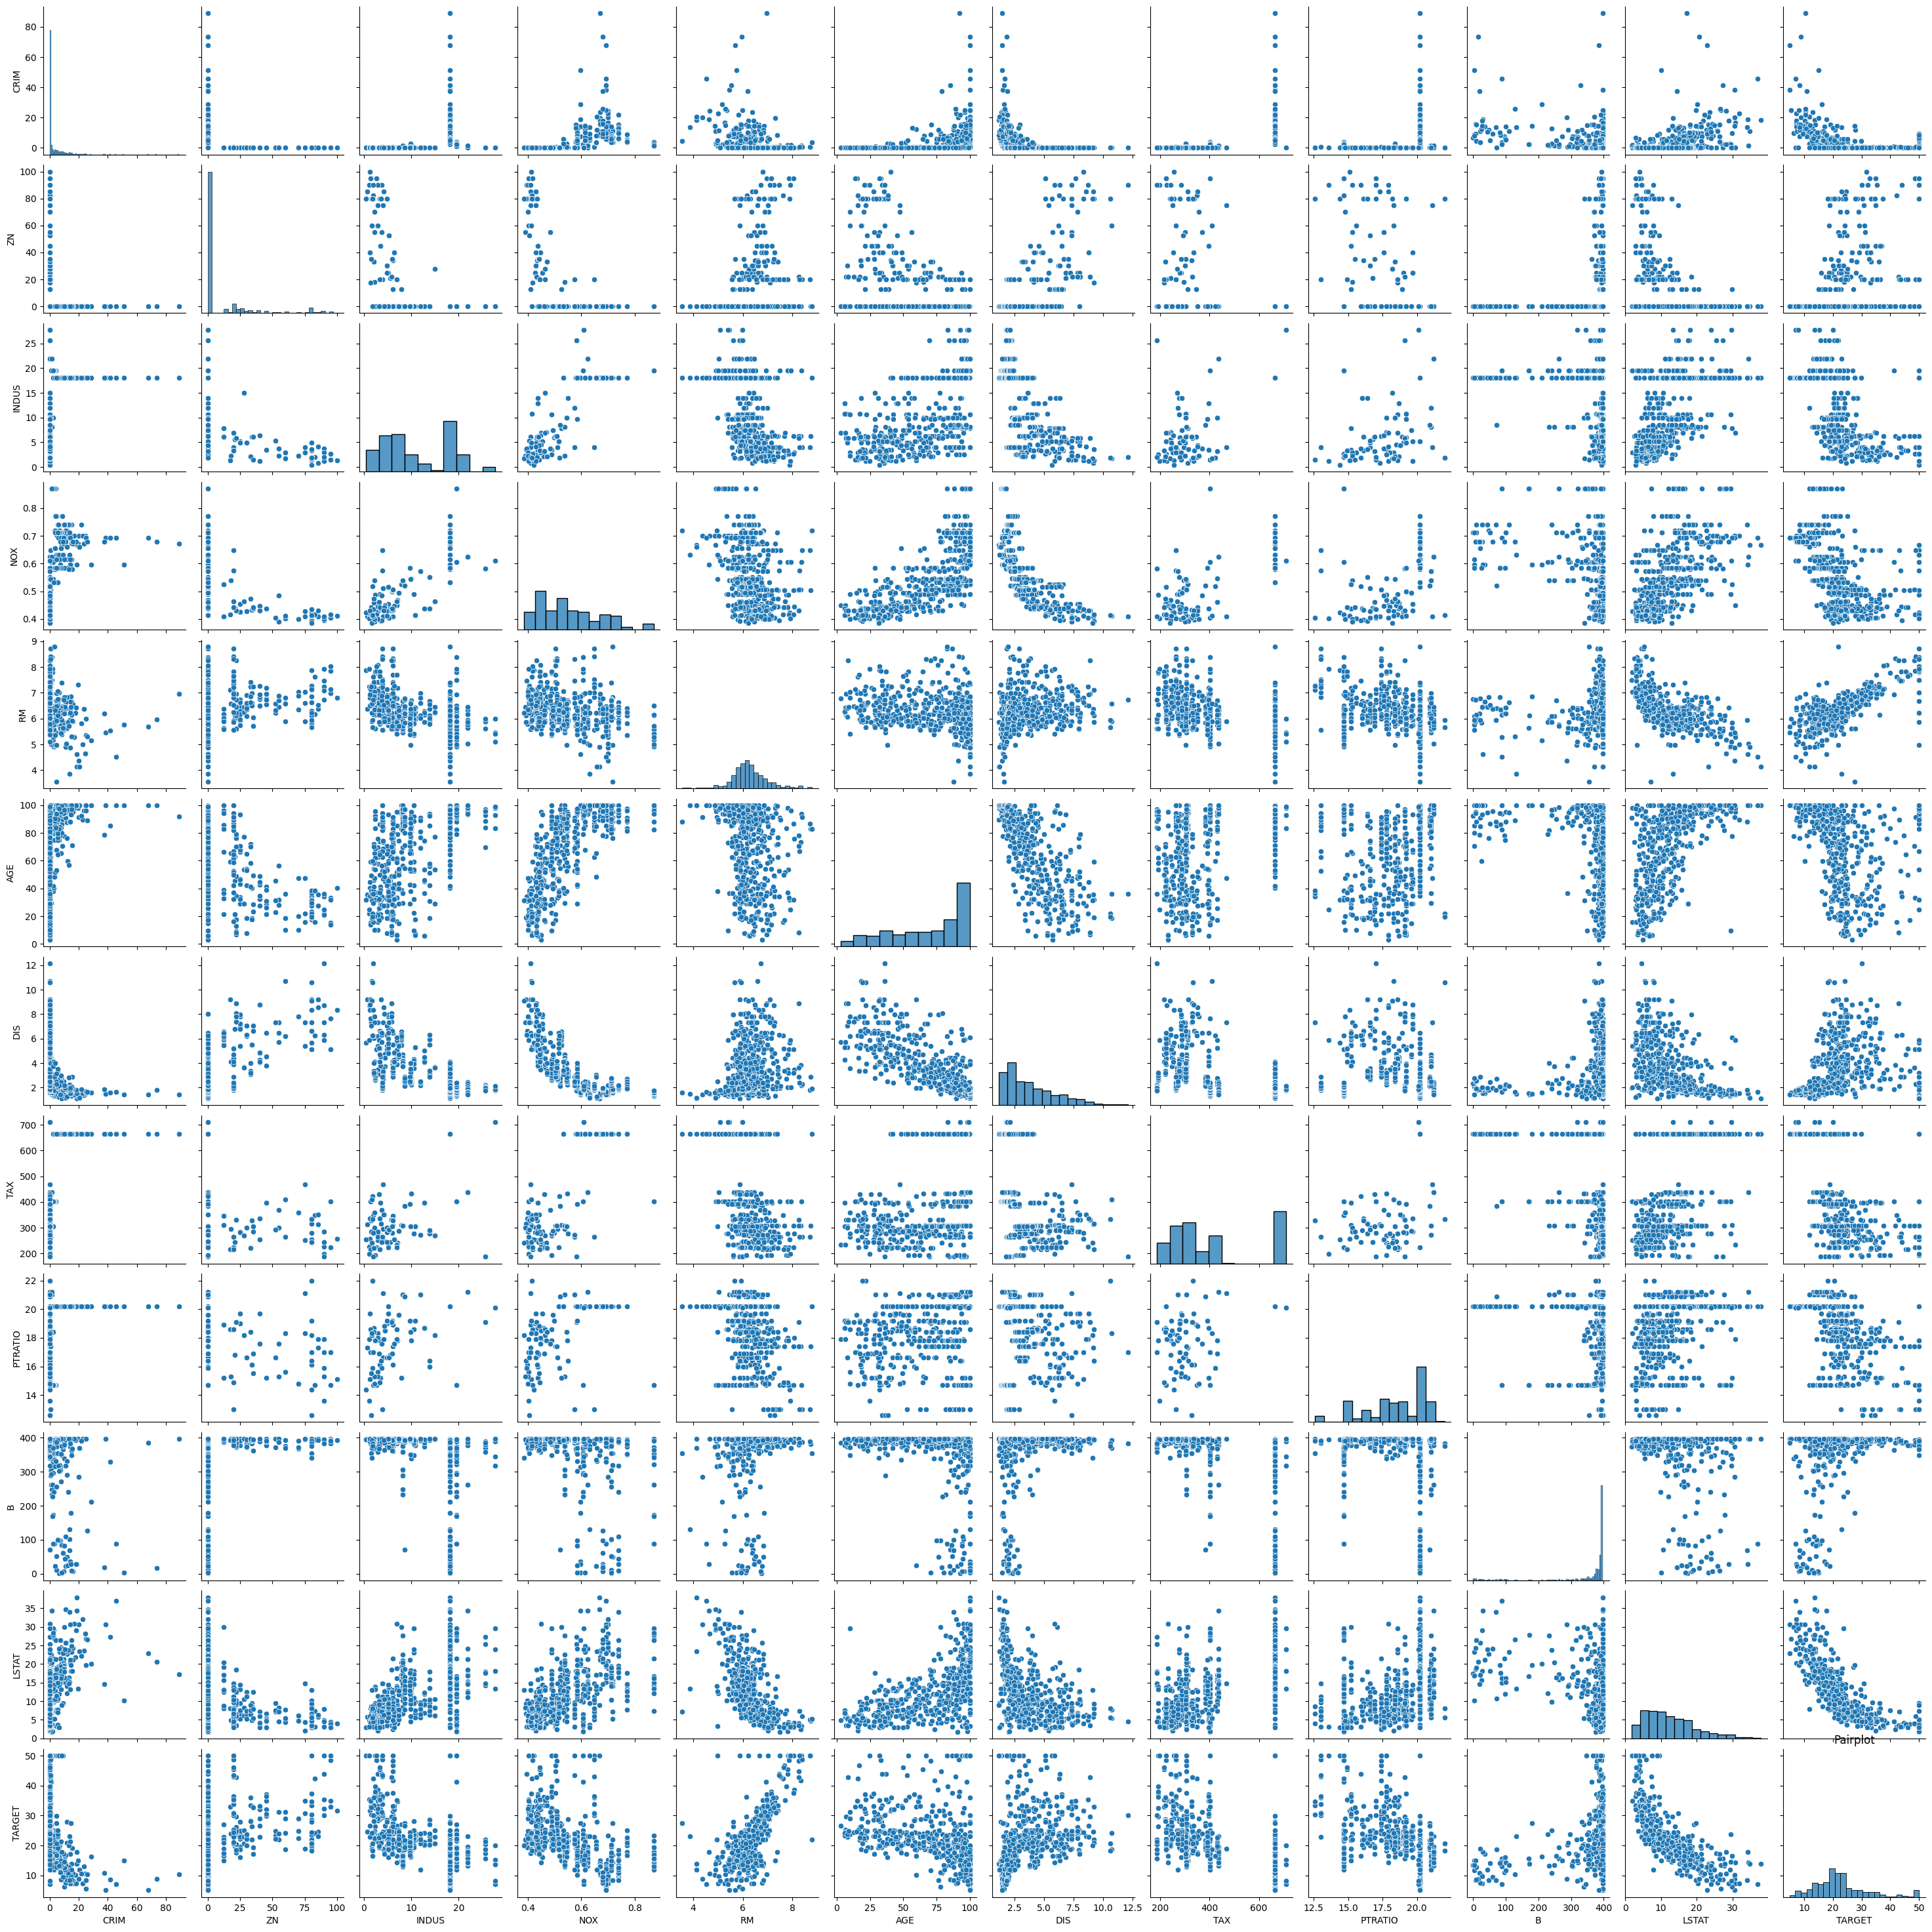

In [45]:
sns.pairplot(df)
plt.title("Pairplot")
plt.show()